In [1]:
import pyKriging
from pyKriging.krige import kriging
from pyKriging.samplingplan import samplingplan
from pyKriging.regressionkrige import regression_kriging

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from kriging_calib_3D import AutoFocus




[3. 4. 5.]
[42094. 41694. 45954.]


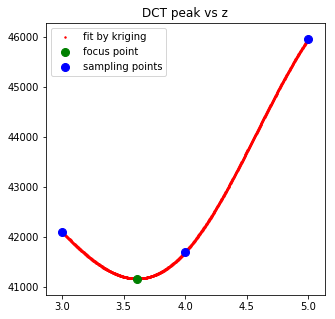

focus (x,y,z): [328.         250.           3.60860861]


In [2]:
from skimage.io import imread_collection

col = imread_collection('images/fixed xy changing z/img*.jpg')
no_of_img=np.shape(col)[0]

def getimage(z):
    return col[int(z)]

# startz, endz = 0,no_of_img-1
startz, endz = 3,5
no_of_img = endz-startz+1
a=AutoFocus(getimage, startz, endz)

print('focus (x,y,z): ' + str(a.kriging_dct_focus(z_pts=no_of_img, thetamax=1e0,show=True)))

[-20996.         -20942.66666667 -20889.33333333 -20836.        ]
[91624. 51080. 59498. 97242.]


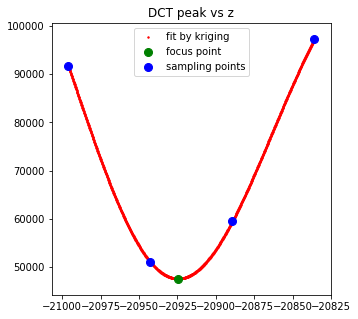

[-20996.         -20942.66666667 -20889.33333333 -20836.        ]
[ 94362.  51124.  59052. 101148.]


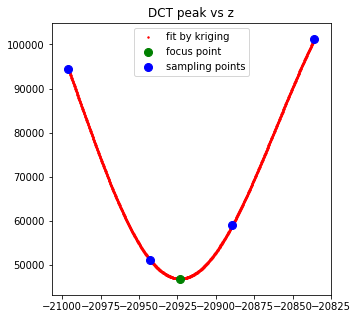

[-20996.         -20942.66666667 -20889.33333333 -20836.        ]
[ 95774.  52234.  56336. 100804.]


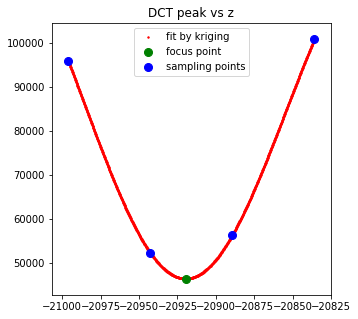

[-20996.         -20942.66666667 -20889.33333333 -20836.        ]
[ 97186.  55878.  57372. 101296.]


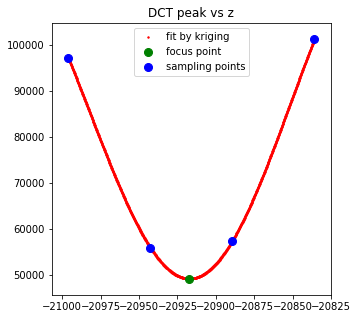

[-20996.         -20942.66666667 -20889.33333333 -20836.        ]
[89128. 50862. 60734. 96908.]


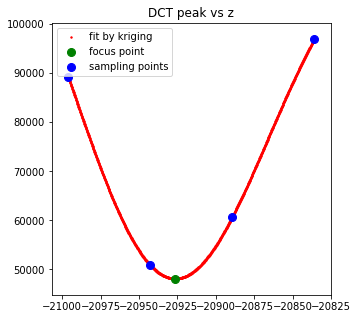

[-20996.         -20942.66666667 -20889.33333333 -20836.        ]
[ 91248.  51966.  60492. 101582.]


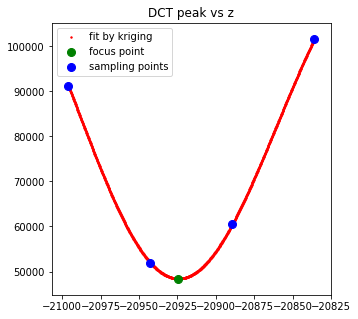

[-20996.         -20942.66666667 -20889.33333333 -20836.        ]
[ 93042.  52664.  59228. 101236.]


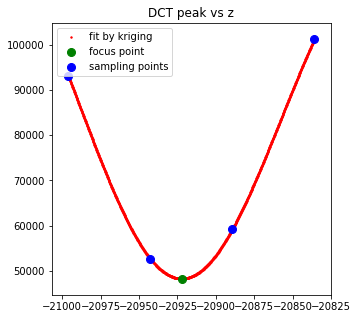

[-20996.         -20942.66666667 -20889.33333333 -20836.        ]
[ 93464.  54368.  57174. 100360.]


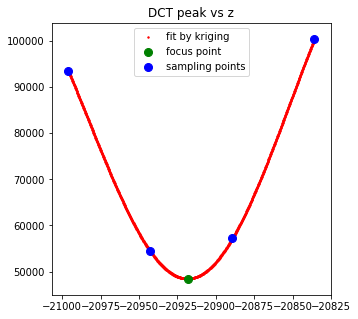

[-20996.         -20942.66666667 -20889.33333333 -20836.        ]
[81870. 48054. 60634. 94082.]


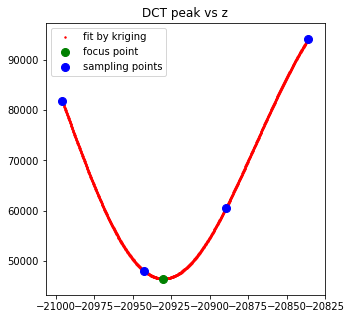

[-20996.         -20942.66666667 -20889.33333333 -20836.        ]
[84338. 49410. 59880. 97574.]


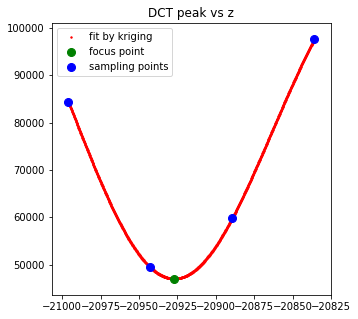

[-20996.         -20942.66666667 -20889.33333333 -20836.        ]
[85340. 50278. 58482. 97114.]


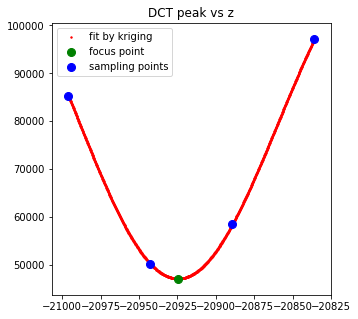

[-20996.         -20942.66666667 -20889.33333333 -20836.        ]
[85988. 51030. 57548. 96900.]


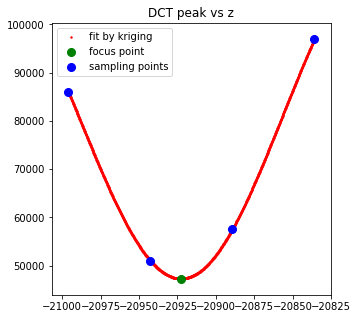

[-20996.         -20942.66666667 -20889.33333333 -20836.        ]
[56152. 39462. 53036. 75952.]


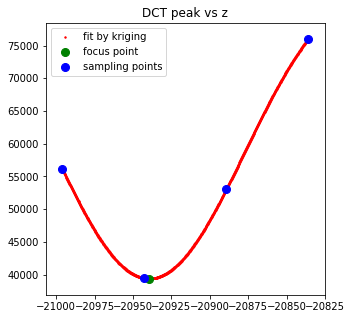

[-20996.         -20942.66666667 -20889.33333333 -20836.        ]
[56550. 39576. 52762. 77320.]


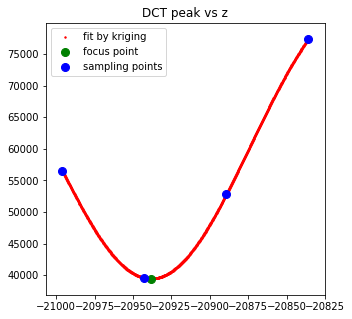

[-20996.         -20942.66666667 -20889.33333333 -20836.        ]
[55186. 40392. 51632. 76032.]


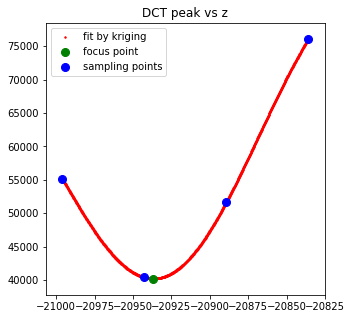

[-20996.         -20942.66666667 -20889.33333333 -20836.        ]
[54384. 41118. 50128. 74204.]


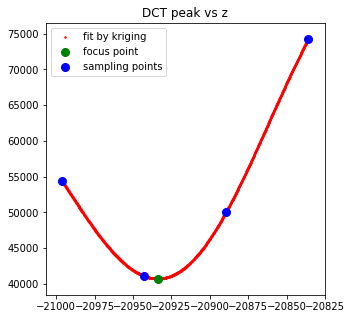

[[464. 470. 469. 468.]
 [328. 327. 323. 323.]
 [188. 184. 181. 178.]
 [ 48.  41.  35.  25.]] [[ 78. 183. 288. 396.]
 [ 79. 184. 290. 398.]
 [ 85. 188. 293. 399.]
 [ 90. 196. 299. 407.]] [[-20924.72872873 -20923.44744745 -20919.76376376 -20917.36136136]
 [-20926.49049049 -20924.40840841 -20922.32632633 -20918.48248248]
 [-20930.17417417 -20927.13113113 -20924.72872873 -20922.80680681]
 [-20939.46346346 -20938.34234234 -20936.9009009  -20934.01801802]]


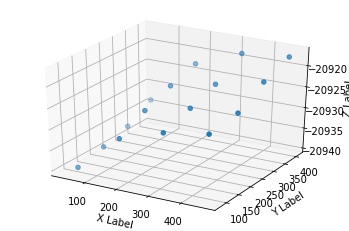

In [3]:
from skimage.io import imread_collection

x=[-70,-13,43,100]
y=[-60,-17,27,70]
z=[-20836,-20890,-20943,-20996]

xf=np.zeros((4,4))
yf=np.zeros((4,4))
zf=np.zeros((4,4))
for i,x1 in enumerate(x):
    for j,y1 in enumerate(y):
        def getimage(z1):
            z1 = min(z, key=lambda x:abs(x-z1))
            return imread_collection('images/xyz imaging beam image/'+str(x1)+' '+str(y1)+' '+str(z1)+'.jpg')[0]

        startz, endz = -20836,-20996
        no_of_img = 4


        a=AutoFocus(getimage, startz, endz)

        xf[i][j],yf[i][j],zf[i][j]=a.kriging_dct_focus(z_pts=no_of_img, thetamax=1e0,show=True)
        
        # print('focus (x,y,z): ' + str(a.kriging_dct_focus(z_pts=no_of_img, thetamax=1e0,show=True)))
print(xf,yf,zf)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xf,yf,zf)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()